In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [32]:
dataset=pd.read_csv("insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
dataset=dataset.dropna()
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
print("Dataset Overview:")
print(dataset.head())

# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())

Dataset Overview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



Dataset Description:
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq     

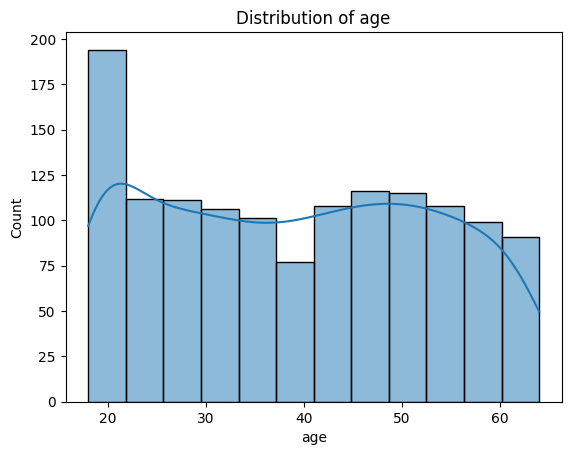

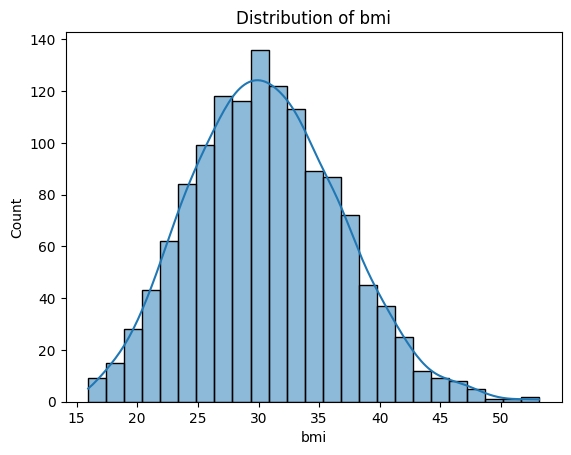

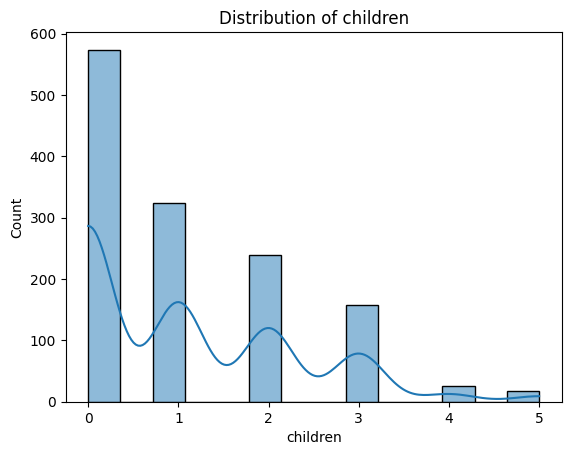

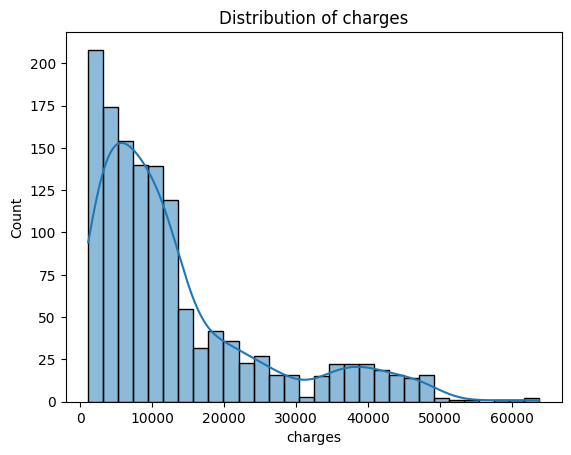

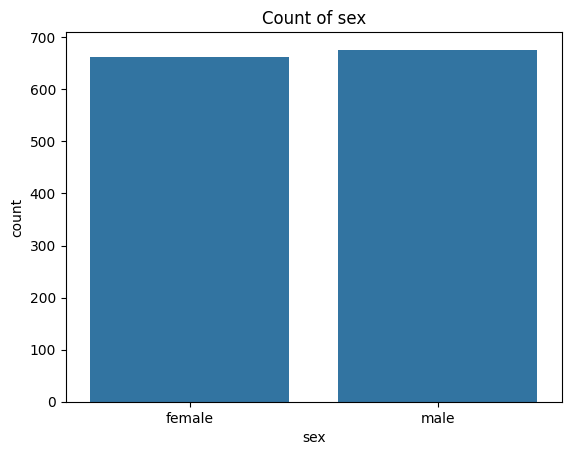

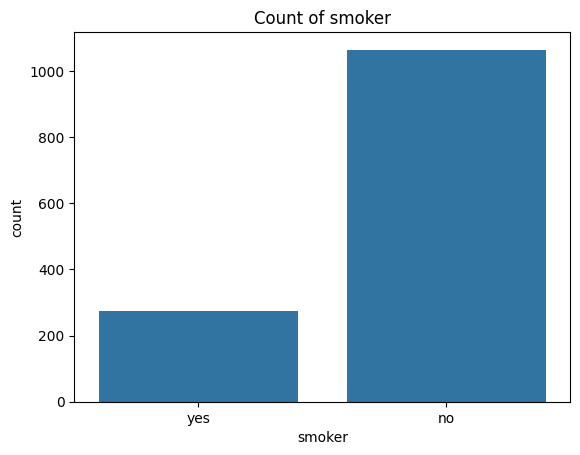

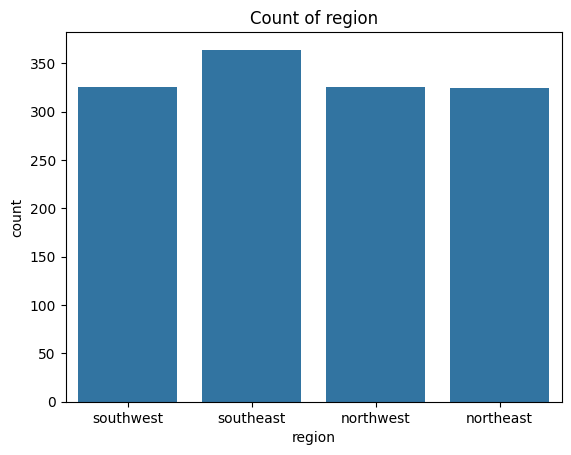

In [36]:
print("\nDataset Description:")
print(dataset.describe(include='all'))

# Visualize distributions of numerical features
numerical_features = ["age", "bmi", "children", "charges"]
for feature in numerical_features:
    sns.histplot(dataset[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

# Visualize categorical features
categorical_features = ["sex", "smoker", "region"]
for feature in categorical_features:
    sns.countplot(data=dataset, x=feature)
    plt.title(f"Count of {feature}")
    plt.show()

In [37]:
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_categorical = encoder.fit_transform(dataset[categorical_features])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

In [38]:
processed_data = pd.concat([dataset[numerical_features], encoded_df], axis=1)

# Feature Scaling
scaler = StandardScaler()
processed_data[numerical_features] = scaler.fit_transform(processed_data[numerical_features])


In [39]:
processed_data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,0.0,1.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,-0.953689,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,-0.728675,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.719843,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,-0.776802,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,1.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,-0.914002,0.0,0.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,-0.961596,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,-0.930362,0.0,0.0,0.0,0.0,1.0


In [40]:
x = processed_data.drop("charges", axis=1)
y = processed_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [42]:
def evaluate_model(y_true, y_pred):
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R-Squared (R²): {r2_score(y_true, y_pred):.2f}")

# 1. Tuning Support Vector Regressor
print("\n--- Tuning Support Vector Regressor ---")
svr_params = {
    'kernel': ['linear', 'rbf'],        # Kernel types
    'C': [1, 10, 100],                 # Regularization parameter
    'gamma': [0.01, 0.1, 1],           # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.5]         # Tolerance margin
}

svr_grid = GridSearchCV(SVR(), svr_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
svr_grid.fit(X_train, y_train)
print("Best Parameters for SVR:", svr_grid.best_params_)
svr_best = svr_grid.best_estimator_
svr_tuned_predictions = svr_best.predict(X_test)
evaluate_model(y_test, svr_tuned_predictions)


--- Tuning Support Vector Regressor ---
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END ...........C=1, epsilon=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, epsilon=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=1, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .........C=1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END .........C=1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ........C=1, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .........C=1, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ............C=1, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ............C=1, epsilon=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] E

In [43]:
# 2. Tuning Gradient Boosting Regressor
print("\n--- Tuning Gradient Boosting Regressor ---")
gbr_params = {
    'n_estimators': [100, 200, 300],   # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2], # Shrinkage rate
    'max_depth': [3, 5, 7],            # Maximum depth of the tree
    'subsample': [0.8, 1.0],           # Fraction of samples used for training
}

gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
gbr_grid.fit(X_train, y_train)

print("Best Parameters for GBR:", gbr_grid.best_params_)
gbr_best = gbr_grid.best_estimator_
gbr_tuned_predictions = gbr_best.predict(X_test)
evaluate_model(y_test, gbr_tuned_predictions)


--- Tuning Gradient Boosting Regressor ---
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_esti

In [44]:
print("\n--- Tuning Decision Tree Regressor ---")
dt_params = {
    'max_depth': [3, 5, 10, None],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]          # Minimum samples in a leaf node
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
dt_grid.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", dt_grid.best_params_)
dt_best = dt_grid.best_estimator_
dt_tuned_predictions = dt_best.predict(X_test)
evaluate_model(y_test, dt_tuned_predictions)


--- Tuning Decision Tree Regressor ---
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time= 

In [45]:
print("\n--- Tuning Random Forest Regressor ---")
rf_params = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [3, 5, 10, None],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]          # Minimum samples in a leaf node
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
rf_tuned_predictions = rf_best.predict(X_test)
evaluate_model(y_test, rf_tuned_predictions)


--- Tuning Random Forest Regressor ---
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a function to evaluate the model
def evaluate_model(y_true, y_pred):
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R-Squared (R2 Score): {r2_score(y_true, y_pred):.2f}")

In [69]:
print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Train the model
lr_predictions = lr_model.predict(X_test)  # Predict on test data
evaluate_model(y_test, lr_predictions)




--- Linear Regression ---
Mean Absolute Error (MAE): 0.35
Mean Squared Error (MSE): 0.23
R-Squared (R2 Score): 0.78


In [48]:
print("\n--- Decision Tree Regressor ---")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  # Train the model
dt_predictions = dt_model.predict(X_test)  # Predict on test data
evaluate_model(y_test, dt_predictions)



--- Decision Tree Regressor ---
Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.29
R-Squared (R2 Score): 0.72


In [49]:
print("\n--- Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Train the model
rf_predictions = rf_model.predict(X_test)  # Predict on test data
evaluate_model(y_test, rf_predictions)


--- Random Forest Regressor ---
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.14
R-Squared (R2 Score): 0.87


In [50]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
print("\n--- Support Vector Regressor ---")
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Radial Basis Function kernel
svr_model.fit(X_train, y_train)  # Train the model
svr_predictions = svr_model.predict(X_test)  # Predict on test data
evaluate_model(y_test, svr_predictions)


--- Support Vector Regressor ---
Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.14
R-Squared (R2 Score): 0.86


In [51]:
print("\n--- Gradient Boosting Regressor ---")
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)  # Train the model
gb_predictions = gb_model.predict(X_test)  # Predict on test data
evaluate_model(y_test, gb_predictions)


--- Gradient Boosting Regressor ---
Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.13
R-Squared (R2 Score): 0.88


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Function to calculate RMSE as a scoring metric
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)  # Define RMSE scorer

# 1. Linear Regression
print("\n--- Linear Regression Cross-Validation ---")
lr_model = LinearRegression()
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring=rmse_scorer)
print(f"Linear Regression RMSE (per fold): {-lr_cv_scores}")
print(f"Linear Regression Average RMSE: {-np.mean(lr_cv_scores):.2f}")


--- Linear Regression Cross-Validation ---
Linear Regression RMSE (per fold): [0.52331394 0.46785892 0.49502445 0.56385328 0.48891995]
Linear Regression Average RMSE: 0.51


In [60]:
print("\n--- Decision Tree Regressor Cross-Validation ---")
dt_model = DecisionTreeRegressor(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring=rmse_scorer)
print(f"Decision Tree RMSE (per fold): {-dt_cv_scores}")
print(f"Decision Tree Average RMSE: {-np.mean(dt_cv_scores):.2f}")



--- Decision Tree Regressor Cross-Validation ---
Decision Tree RMSE (per fold): [0.571315   0.4650721  0.60121163 0.60001397 0.51485356]
Decision Tree Average RMSE: 0.55


In [61]:
print("\n--- Random Forest Regressor Cross-Validation ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=rmse_scorer)
print(f"Random Forest RMSE (per fold): {-rf_cv_scores}")
print(f"Random Forest Average RMSE: {-np.mean(rf_cv_scores):.2f}")



--- Random Forest Regressor Cross-Validation ---
Random Forest RMSE (per fold): [0.41845035 0.33710347 0.42635507 0.4515746  0.41840487]
Random Forest Average RMSE: 0.41


In [62]:
print("\n--- Support Vector Regressor Cross-Validation ---")
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_cv_scores = cross_val_score(svr_model, X_train, y_train, cv=5, scoring=rmse_scorer)
print(f"SVR RMSE (per fold): {-svr_cv_scores}")
print(f"SVR Average RMSE: {-np.mean(svr_cv_scores):.2f}")


--- Support Vector Regressor Cross-Validation ---
SVR RMSE (per fold): [0.42143246 0.36933779 0.42220155 0.47578902 0.39624185]
SVR Average RMSE: 0.42


In [63]:
print("\n--- Gradient Boosting Regressor Cross-Validation ---")
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring=rmse_scorer)
print(f"Gradient Boosting RMSE (per fold): {-gbr_cv_scores}")
print(f"Gradient Boosting Average RMSE: {-np.mean(gbr_cv_scores):.2f}")



--- Gradient Boosting Regressor Cross-Validation ---
Gradient Boosting RMSE (per fold): [0.40374954 0.29655358 0.39675639 0.44445843 0.39867655]
Gradient Boosting Average RMSE: 0.39
